# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


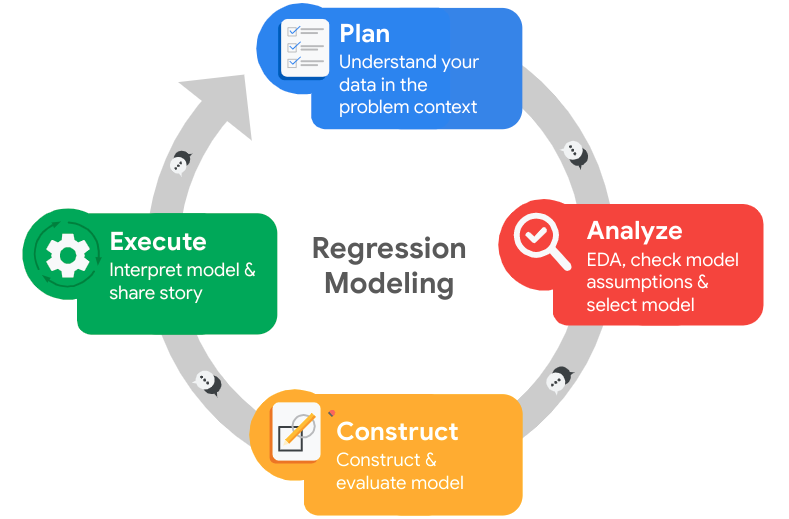

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [72]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

import pickle as pkl
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df1 = df0.rename(columns={'time_spend_company': 'tenure', 'Department': 'department','Work_accident': 'work_accident'}, index={'ONE': 'Row_1'})

# Display all column names after the update
### YOUR CODE HERE ###
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
duplicated=df1.duplicated(keep="first")
duplicated

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [32]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df2=df1[duplicated]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008 entries, 396 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3008 non-null   float64
 1   last_evaluation        3008 non-null   float64
 2   number_project         3008 non-null   int64  
 3   average_montly_hours   3008 non-null   int64  
 4   tenure                 3008 non-null   int64  
 5   work_accident          3008 non-null   int64  
 6   left                   3008 non-null   int64  
 7   promotion_last_5years  3008 non-null   int64  
 8   department             3008 non-null   object 
 9   salary                 3008 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 258.5+ KB


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


### Check outliers

Check for outliers in the data.

In [9]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
df2=df1.drop_duplicates()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [47]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df3=df2.drop(["Department","salary"], axis=1)
a=df3[(np.abs(stats.zscore(df3)) > 2).all(axis=1)]
a

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [10]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
#df2["left"].value_counts(normalize=True).mul(100).round(2)
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [12]:
# Create a plot as needed
### YOUR CODE HERE ###
def table(df):
    print(df.value_counts(normalize=True).mul(100).round(2))
    
    
#df2["satisfaction_level"].value_counts(normalize=True).mul(100).round(2)

0    84.57
1    15.43
Name: work_accident, dtype: float64


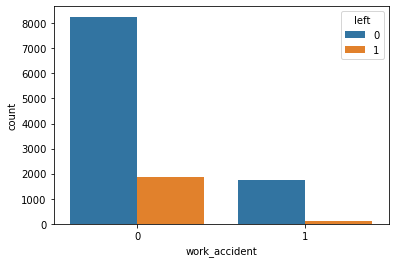

In [13]:
# Create a plot as needed
### YOUR CODE HERE ###
table(df2["work_accident"])
sns.countplot(data=df2, x="work_accident", hue="left")

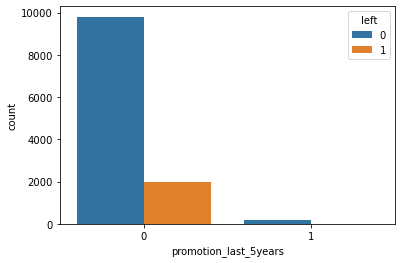

In [85]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data=df2, x="promotion_last_5years", hue="left")

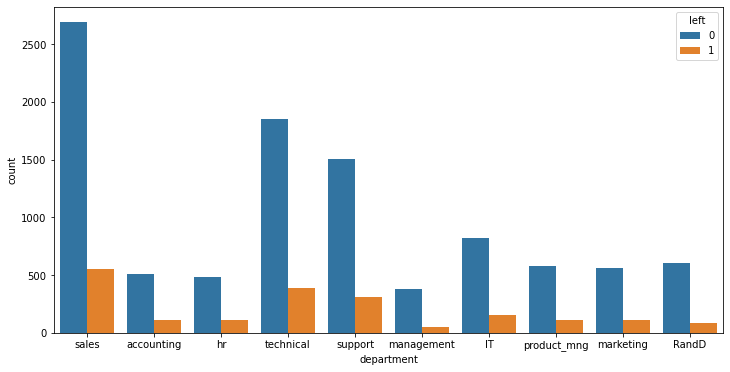

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df2, x="department", hue="left", ax=ax)

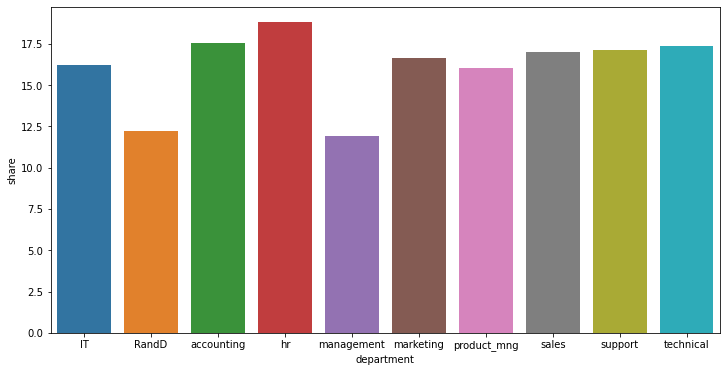

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
tab1=df2[["left","department"]].groupby(by="department").sum().reset_index()
tab2=df2[["left","department"]].groupby(by="department").count().reset_index()
tab2=tab2.rename(columns={'left': 'total'})
#tab3=pd.concat([tab1, tab2], axis=1)
tab3= pd.merge(tab1,tab2,on='department', how='left')
tab3["share"]=tab3["left"]/tab3["total"]*100
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=tab3, x="department", y="share", ax=ax)

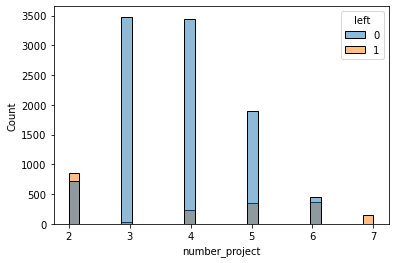

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df2, x="number_project", hue="left")

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df2, x="average_montly_hours")

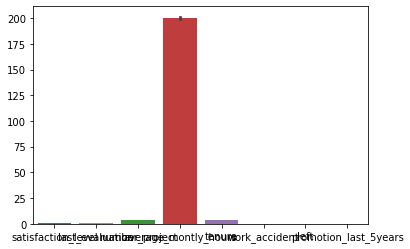

In [89]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df2)

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





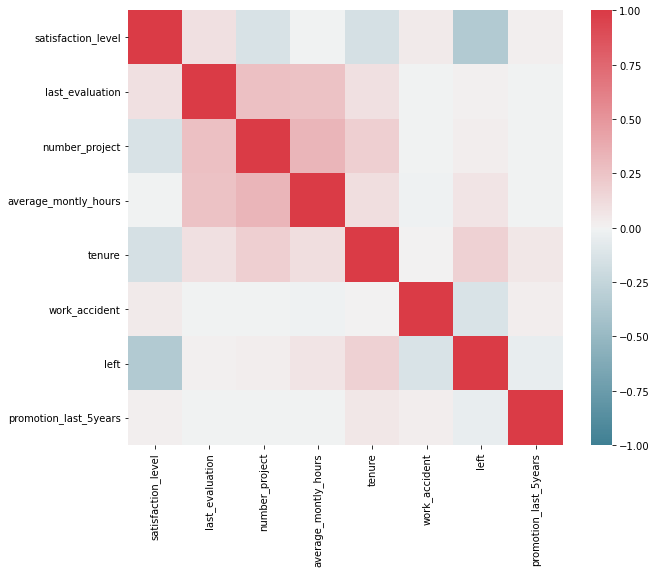

In [20]:
## Checking the correlation between variables 
corr=df2.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

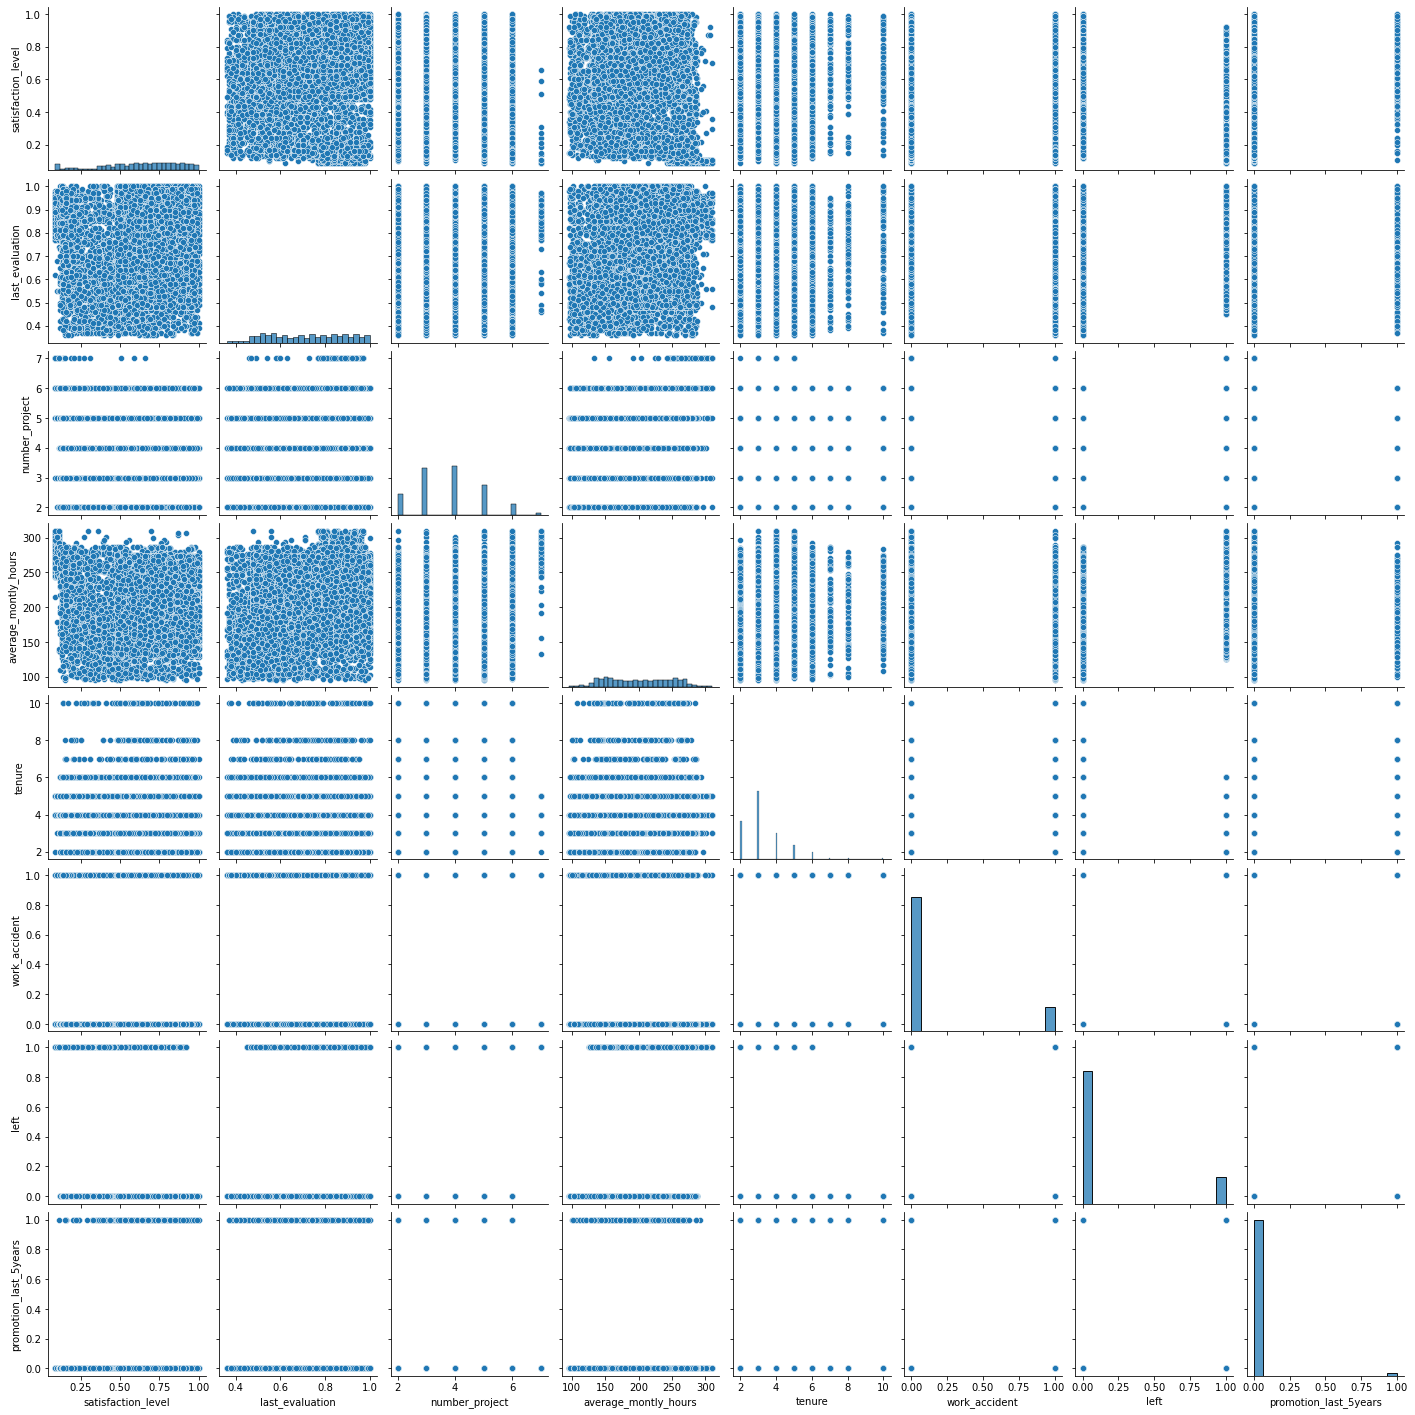

In [22]:
## Checking the linearity 
sns.pairplot(df2)

In [24]:
### converting categorical values into numerical ones
df3=pd.get_dummies(df2, drop_first=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   department_RandD        11991 non-null  uint8  
 9   department_accounting   11991 non-null  uint8  
 10  department_hr           11991 non-null  uint8  
 11  department_management   11991 non-null  uint8  
 12  department_marketing    11991 non-null  uint8  
 13  department_product_mng  11991 non-null  uint8  
 14  department_sales        11991 non-null

In [43]:
x=df3.drop("left", axis=1)
y=df3["left"]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=13)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 4347 to 338
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      8993 non-null   float64
 1   last_evaluation         8993 non-null   float64
 2   number_project          8993 non-null   int64  
 3   average_montly_hours    8993 non-null   int64  
 4   tenure                  8993 non-null   int64  
 5   work_accident           8993 non-null   int64  
 6   promotion_last_5years   8993 non-null   int64  
 7   department_RandD        8993 non-null   uint8  
 8   department_accounting   8993 non-null   uint8  
 9   department_hr           8993 non-null   uint8  
 10  department_management   8993 non-null   uint8  
 11  department_marketing    8993 non-null   uint8  
 12  department_product_mng  8993 non-null   uint8  
 13  department_sales        8993 non-null   uint8  
 14  department_support      8993 non-null 

In [44]:
## Defining the model
lo=LogisticRegression(solver='liblinear')
model1=lo.fit(x_train, y_train)

In [45]:
model1.coef_

array([[-3.88835916,  0.61786379, -0.29278981,  0.00394967,  0.3043197 ,
        -1.46675963, -1.02477301, -0.46259741, -0.06221332,  0.0457745 ,
        -0.292844  , -0.04584374, -0.12267583,  0.0233285 ,  0.0342071 ,
         0.05113747,  1.67704502,  1.1747262 ]])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 4347 to 338
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    8993 non-null   float64
 1   last_evaluation       8993 non-null   float64
 2   average_montly_hours  8993 non-null   int64  
 3   tenure                8993 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 351.3 KB


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [50]:
### predicting the model
y_pred=model1.predict(x_test)

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [51]:
### YOUR CODE HERE ###
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.823215
Precision: 0.477157
Recall: 0.180422
F1 Score: 0.261838


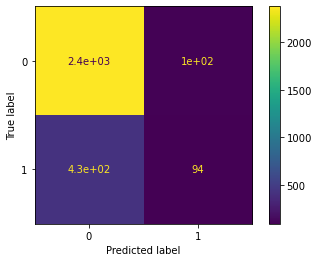

In [53]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = model1.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model1.classes_)
disp.plot()

In [62]:
### I removed some less important variable based on my judgement 
x2=df2[["satisfaction_level", "last_evaluation", "average_montly_hours", "tenure"]]
y2=df2["left"]
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2, test_size=0.25, random_state=13)
x2_train.info()
model2=lo.fit(x2_train, y2_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 4347 to 338
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    8993 non-null   float64
 1   last_evaluation       8993 non-null   float64
 2   average_montly_hours  8993 non-null   int64  
 3   tenure                8993 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 351.3 KB


In [63]:
model2.coef_

array([[-3.48338772e+00,  9.74025968e-02,  1.64487521e-03,
         2.15614270e-01]])

In [66]:
y2_pred=model2.predict(x2_test)
print("Accuracy:", "%.6f" % metrics.accuracy_score(y2_test, y2_pred))
print("Precision:", "%.6f" % metrics.precision_score(y2_test, y2_pred))
print("Recall:", "%.6f" % metrics.recall_score(y2_test, y2_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y2_test, y2_pred))

Accuracy: 0.844897
Precision: 0.625000
Recall: 0.268714
F1 Score: 0.375839


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

Double-click to enter your responses here.

In [78]:
#Tuning hyperparameter

cv_params = {'n_estimators' : [5,10], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1],}
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)


In [79]:
### Setting up the model
rf = RandomForestClassifier(random_state=0)
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [80]:
%%time

# Fit the model.

### YOUR CODE HERE ###


rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 8 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


CPU times: user 257 ms, sys: 468 ms, total: 726 ms
Wall time: 7.83 s


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    7.7s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              o

In [81]:
## Choosing the highest performing set of hyperparameter
rf_val.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 10}

In [88]:
### Setting up the model with with the highest performing hyperparameters
rf_opt = RandomForestClassifier(n_estimators = 10, max_depth = 10, 
                                min_samples_leaf = 1, random_state = 0)

In [83]:
### fitting the model
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
### fitting the model
y_pred = rf_opt.predict(X_test)

In [85]:
### evaluating the model performance using metrics

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.985657
Precision: 0.977728
Recall: 0.930085
F1 Score: 0.953312


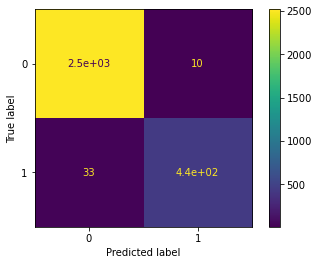

In [86]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot()

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.